In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from app import get_cached_data

In [4]:
data = get_cached_data('new york', '2020-01-01', '2023-12-31')

In [5]:
# basic data check
df = pd.DataFrame(data['hourly'])

df['time'] = pd.to_datetime(df['time'])

df.set_index('time', inplace=True)

print("df head")
print(df.head())
print("\ndf info")
print(df.info())
print("\ntemperature stats")
print(df['temperature_2m'].describe())

units = data.get('hourly_units', {})
print(f"\ntemperature_2m unit: {units.get('temperature_2m', 'N/A')}")

df head
                     temperature_2m
time                               
2020-01-01 00:00:00             4.2
2020-01-01 01:00:00             4.8
2020-01-01 02:00:00             4.5
2020-01-01 03:00:00             4.4
2020-01-01 04:00:00             4.3

df info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2020-01-01 00:00:00 to 2023-12-31 23:00:00
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temperature_2m  35064 non-null  float64
dtypes: float64(1)
memory usage: 547.9 KB
None

temperature stats
count    35064.000000
mean        12.666818
std          9.527157
min        -17.400000
25%          5.000000
50%         12.600000
75%         20.700000
max         37.400000
Name: temperature_2m, dtype: float64

temperature_2m unit: °C


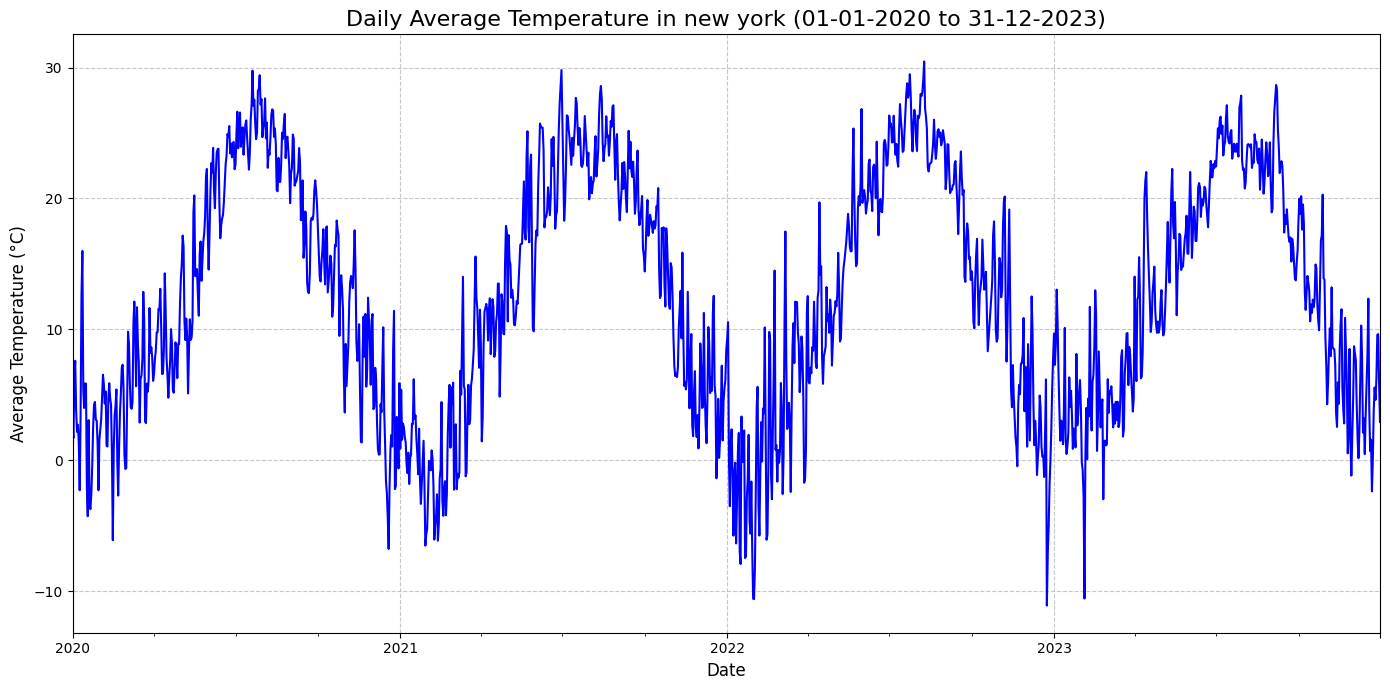

In [9]:
# line plot of temperature vs time
daily_avg_temp = df['temperature_2m'].resample('D').mean()

plt.figure(figsize=(14, 7))
daily_avg_temp.plot(kind='line', color='blue', linewidth=1.5)
plt.title(f'Daily Average Temperature in new york (01-01-2020 to 31-12-2023)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel(f'Average Temperature ({units.get("temperature_2m", "°C")})', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\Pravin-PC\AppData\Local\Temp\ipykernel_19176\874851709.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_temp = df['temperature_2m'].resample('M').mean()


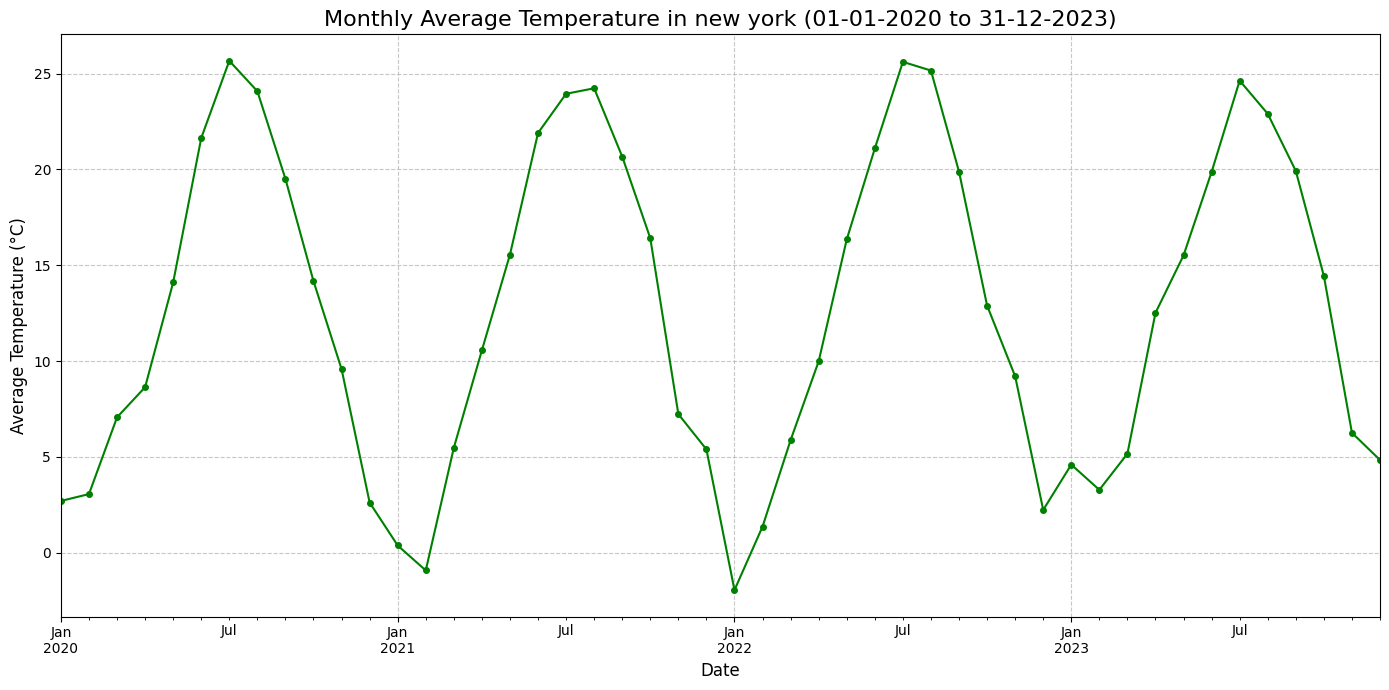

In [10]:
# monthly average
if (df.index.max() - df.index.min()).days > 365:
    monthly_avg_temp = df['temperature_2m'].resample('M').mean()

    plt.figure(figsize=(14, 7))
    monthly_avg_temp.plot(kind='line', color='green', marker='o', markersize=4, linewidth=1.5)
    plt.title(f'Monthly Average Temperature in new york (01-01-2020 to 31-12-2023)', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel(f'Average Temperature ({units.get("temperature_2m", "°C")})', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

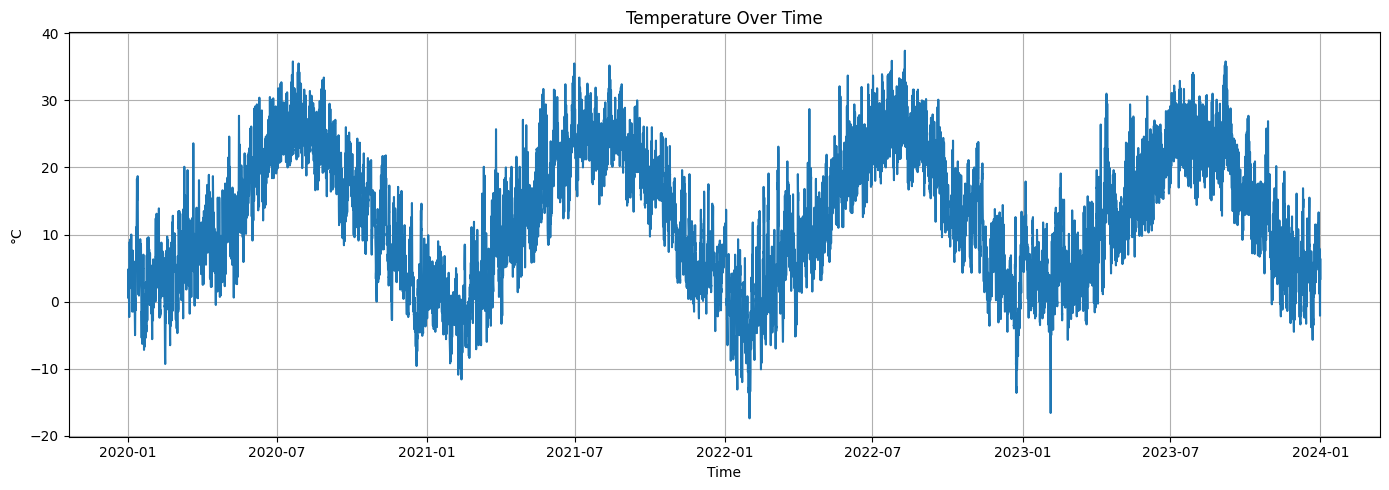

In [12]:
# temperature over time
plt.figure(figsize=(14, 5))
plt.plot(df.index, df['temperature_2m'], label='Hourly Temperature')
plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('°C')
plt.grid(True)
plt.tight_layout()
plt.show()

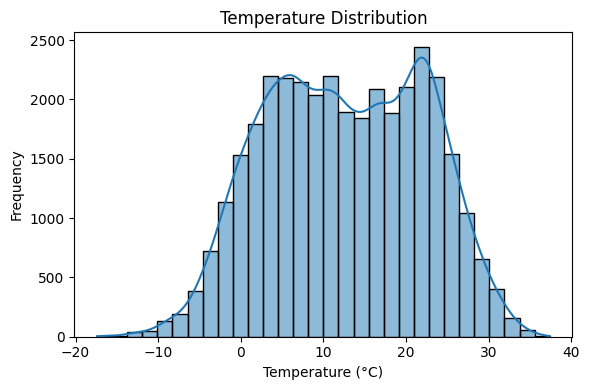

In [14]:
# histogram
plt.figure(figsize=(6, 4))
sns.histplot(df['temperature_2m'], bins=30, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

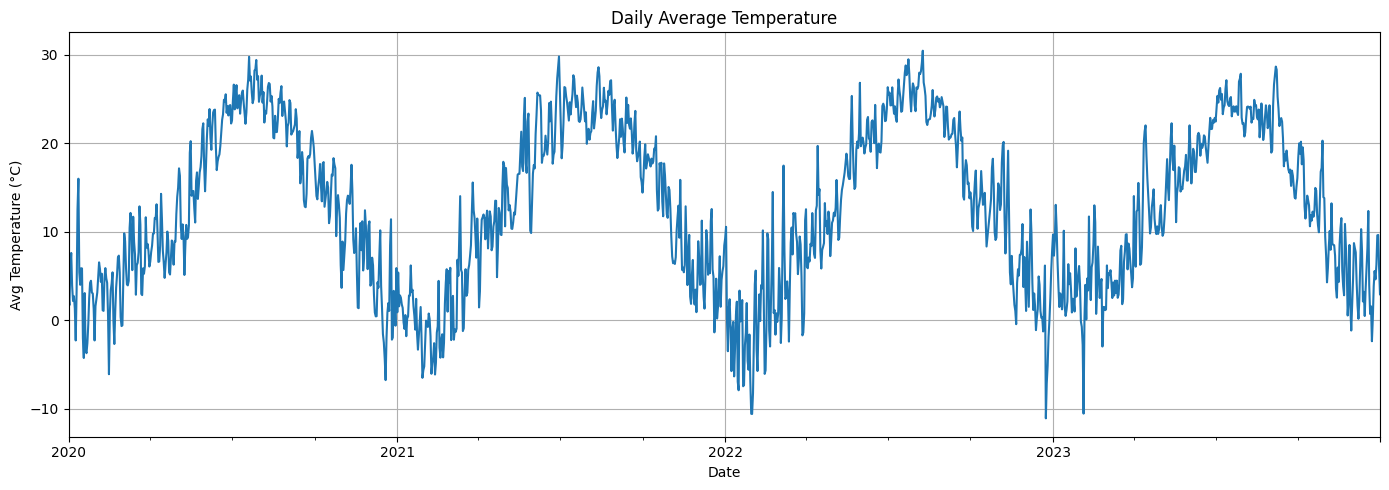

In [15]:
# daily averages
daily_avg = df['temperature_2m'].resample('D').mean()
plt.figure(figsize=(14, 5))
daily_avg.plot()
plt.title('Daily Average Temperature')
plt.xlabel('Date')
plt.ylabel('Avg Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()